# colab 한글 깨짐 방지
- 실행후에 런타임 다시 시작할 것

In [1]:
!apt -qq -y install fonts-nanum > /dev/null

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

sns.set_theme(style="darkgrid")

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=fontpath).get_name() 
fm._rebuild()  


%config InlineBackend.figure_format = 'retina'

plt.rc('font', family=font_name)  
plt.rcParams['axes.unicode_minus'] = False 

지정된 경로를 찾을 수 없습니다.


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\usr\\share\\fonts\\truetype\\nanum\\NanumBarunGothic.ttf'

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


# 앤스콤 4분할 그래프(Anscombe's quartet)
> Frank Anscombe이 데이터를 시각화하지 않고 수치만 확인할 때 발생할 수 있는 함정을 보여주기 위해 만든 그래프  
> - 앤스콤 그래프를 구성하는 데이터 집합은 4개의 그룹으로 구성되어 있다.
> - 4개의 데이터 그룹은 각각 평균, 분산과 같은 수칫값이나 상관관계, 회귀선이 모두 같다.
> - 이런 결과를 통해 4개의 데이터 그룹이 모두 같을 것이라고 착각을 할 수 있다.

### 4개의 그룹 데이터 로드

In [28]:
anscombe = sns.load_dataset("anscombe")

anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [29]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [30]:
anscombe['dataset'].unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

In [31]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']
dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

## 통계 데이터 확인

In [32]:
anscombe.groupby('dataset')[['x','y']].agg(['mean', 'std', 'var'])

x                         y                    
        mean       std   var      mean       std       var
dataset                                                   
I        9.0  3.316625  11.0  7.500909  2.031568  4.127269
II       9.0  3.316625  11.0  7.500909  2.031657  4.127629
III      9.0  3.316625  11.0  7.500000  2.030424  4.122620
IV       9.0  3.316625  11.0  7.500909  2.030579  4.123249

## 데이터 시각화 확인

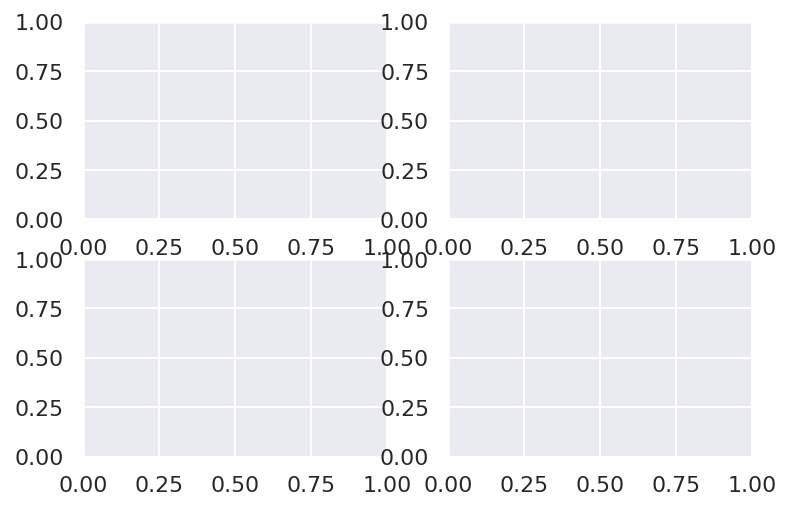

In [ ]:
fig = plt.figure()
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

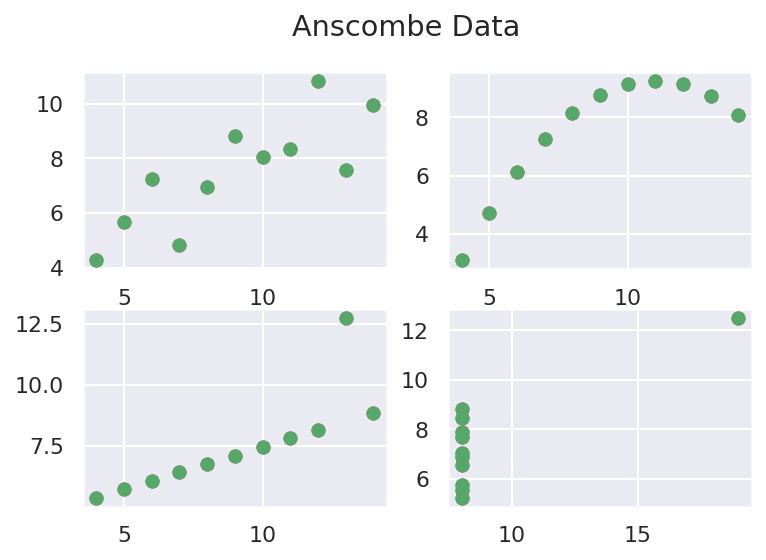

In [ ]:
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

fig.suptitle("Anscombe Data")
fig

# 데이터 시각화를 해야 하는 이유
> 데이터를 주제로 다룬 기사 가운데 '데이터 활용 능력'의 중요성을 강조하는 내용을 종종 볼 수 있습니다. 핵심은 얼마나 많은 양의 데이터를 보유하고 있느냐가 중요한 것이 아니라, 어떻게 활용할 것인가에 대한 답을 가졌는지 그 여부가, 데이터를 기반으로 한 가치 창출의 키라는 것입니다.    

> '데이터 활용 역량'이라 하면 크게 두 가지를 떠올릴 수 있습니다. '데이터 분석'과 '시각적 스토리텔링'입니다.
> - '데이터 분석'은 기술적으로 데이터를 수집하고 정제하는 데이터 가공 단계부터 분석 기법을 활용한 데이터 분석에 이르는 과정에 필요한 능력을 말합니다.  
> - '시각적 스토리텔링'은 데이터 분석 결과를 시각적으로 표현해 스토리텔링을 하는 능력입니다.   
  
과거에는 이 두 역량 간 경계가 뚜렷했던 반면, 최근에는 두 역량을 아우르는 '데이터 시각화'의 중요성이 강조되고 있습니다.



## 데이터 시각화의 장점들

### 많은 양의 데이터를 한눈에 볼 수 있다.

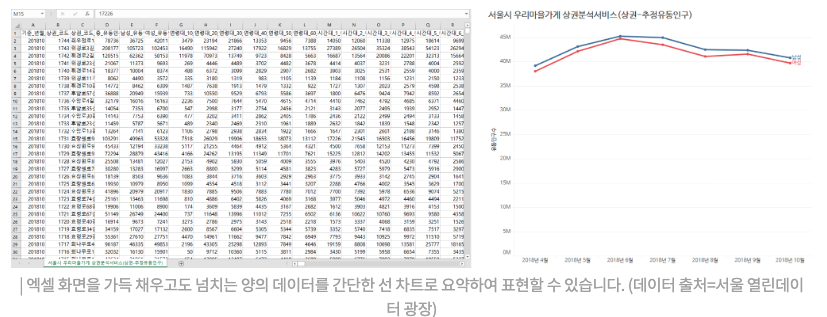

### 데이터 분석에 대한 전문 지식이 없어도, 누구나 쉽게 데이터 인사이트를 찾을 수 있다.
> 데이터 시각화 차트에서 시각화 요소의 형태, 크기, 위치나 색을 근거로 시각적 패턴을 찾을 수 있으며, 이를 통해 인사이트를 얻을 수 있다.

### 요약 통계보다 정확한 데이터 분석 결과를 도출할 수 있다.
> 앤스콤 데이터와 같이 때로는 요약 통계보다 정확한 데이터 분석 결과를 얻을 수 있다. 

In [33]:
anscombe.groupby('dataset')[['x','y']].agg(['mean', 'std', 'var'])

x                         y                    
        mean       std   var      mean       std       var
dataset                                                   
I        9.0  3.316625  11.0  7.500909  2.031568  4.127269
II       9.0  3.316625  11.0  7.500909  2.031657  4.127629
III      9.0  3.316625  11.0  7.500000  2.030424  4.122620
IV       9.0  3.316625  11.0  7.500909  2.030579  4.123249

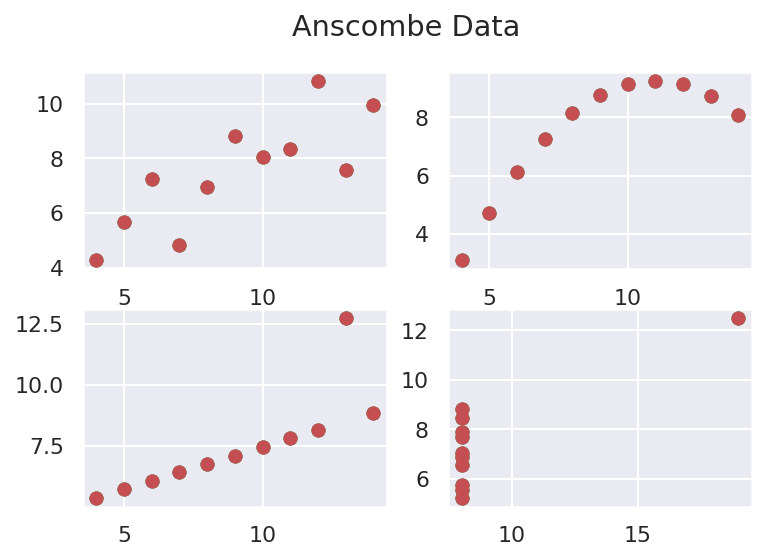

In [ ]:
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

fig.suptitle("Anscombe Data")
fig

### 효과적인 데이터 인사이트 공유로 데이터 기반의 의사결정을 할 수 있다.
> 프레젠테이션 문서 등을 통해 효과적으로 인사이트를 전달할 수 있다.

# Auto ViML

In [ ]:
# 구글 드라이브 연결(데이터 로드를 위해서)
from google.colab import drive
drive.mount('/content/data')

Drive already mounted at /content/data; to attempt to forcibly remount, call drive.mount("/content/data", force_remount=True).


In [ ]:
DATA_PATH = "/content/data/MyDrive/lecture/4. data processing/pandas/data/"

df = pd.read_csv(DATA_PATH+"Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## [sweetviz](https://www.kaggle.com/code/hwangchanghyun/sweetviz-auto-visualization-library-for-you)

In [ ]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.6.3
Uninstalling matplotlib-3.6.3:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.6.3-py3.8-nspkg.pth
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.6.3.dist-info/*
    /usr/local/lib/python3.8/dist-packages/matplotlib/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.8/dist-packages/pylab.py
Proceed (Y/n)? Y
  Successfully uninstalled matplotlib-3.6.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 73.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the

In [ ]:
import sweetviz as sv

In [ ]:
feature_config = sv.FeatureConfig(skip="PassengerId", force_text=["Age"])

In [ ]:
my_report = sv.compare_intra(df, df["Sex"] == "male", ["Male", "Female"],'Survived', feature_config)

                                             |          | [  0%]   00:00 -> (? left)


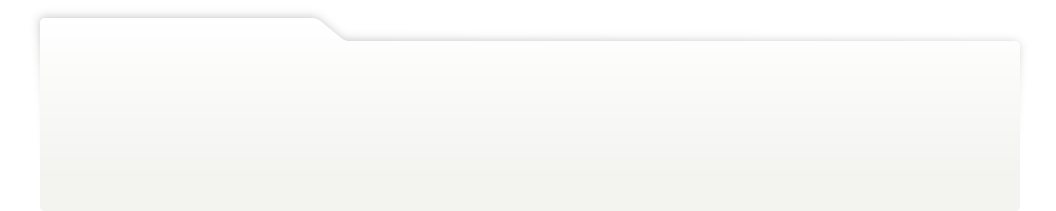
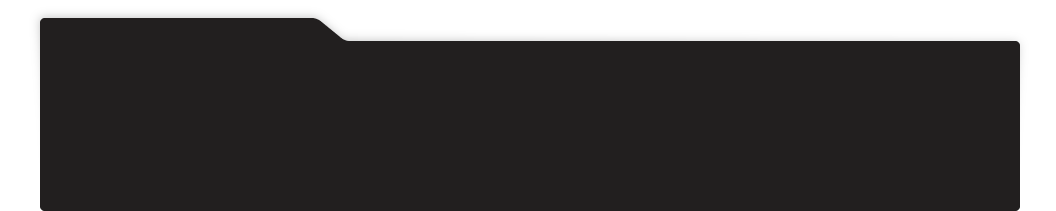
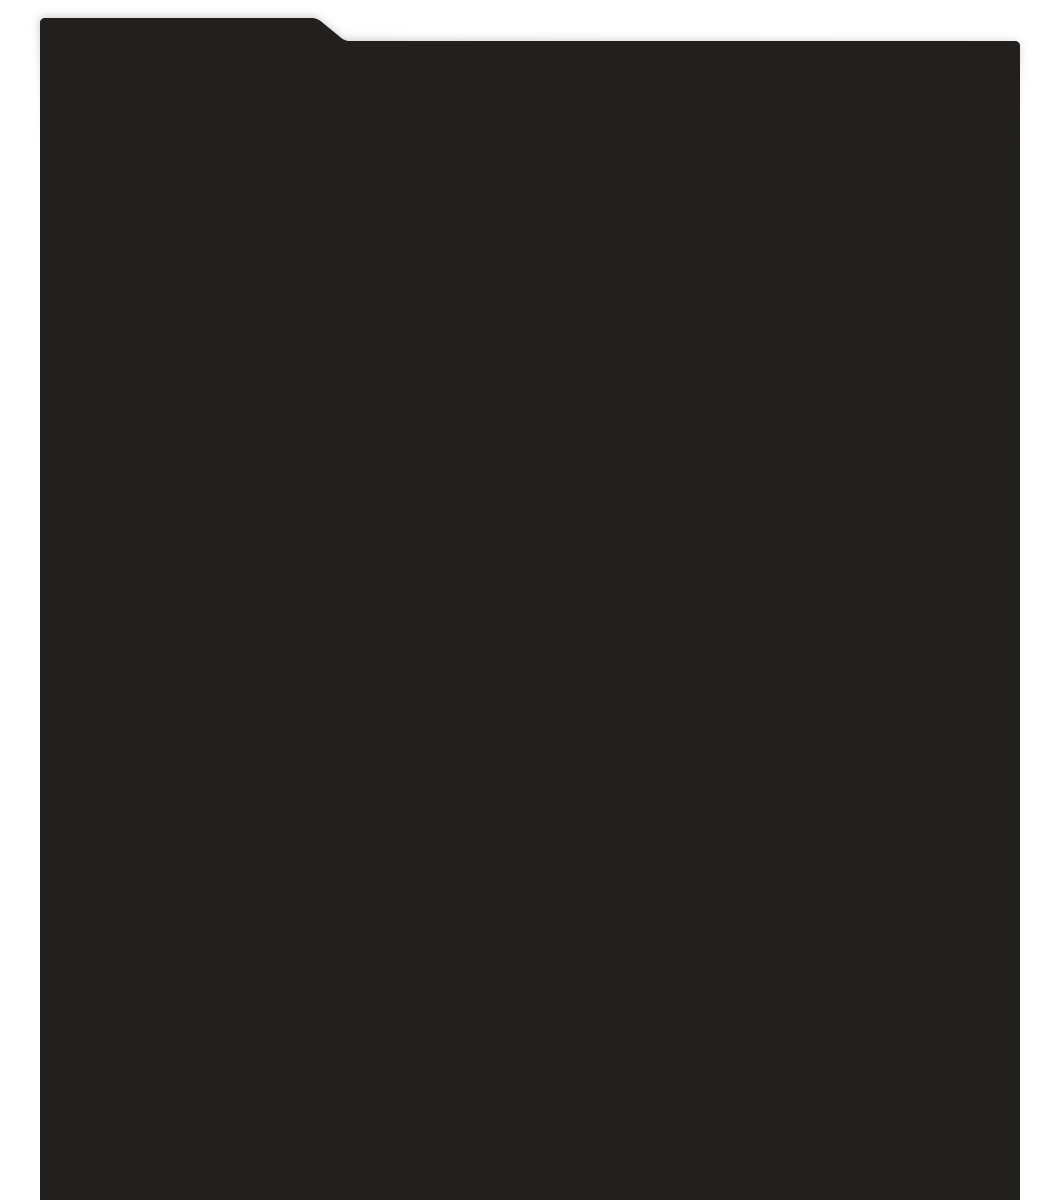
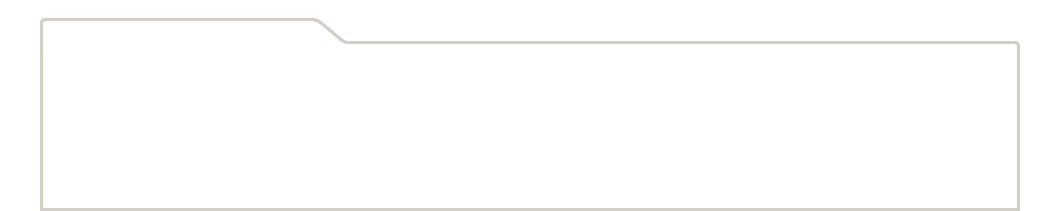
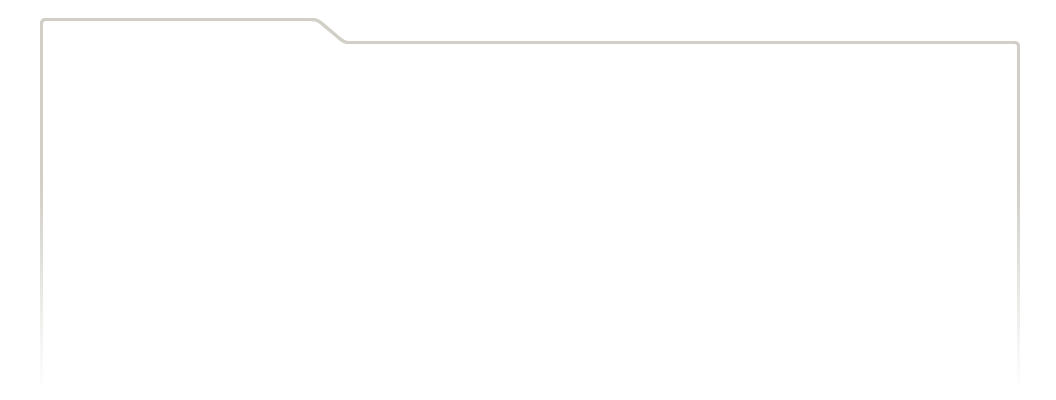
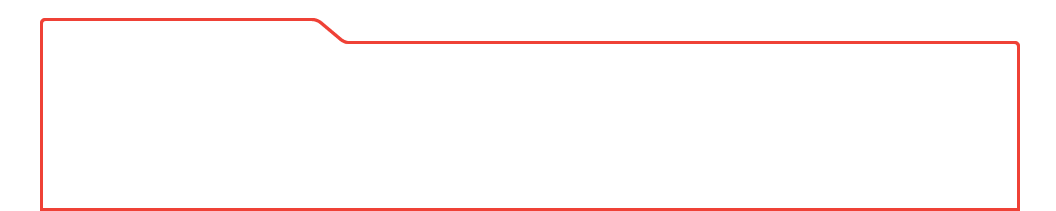
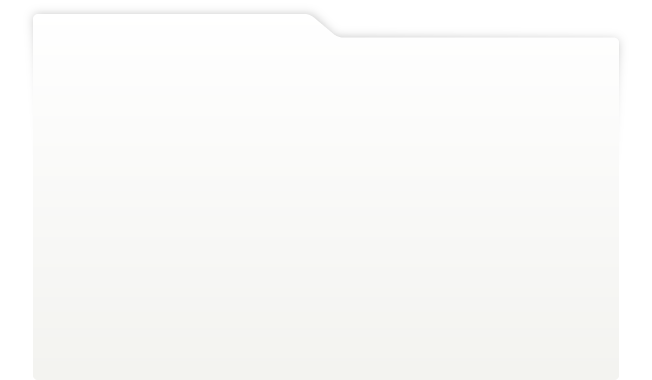
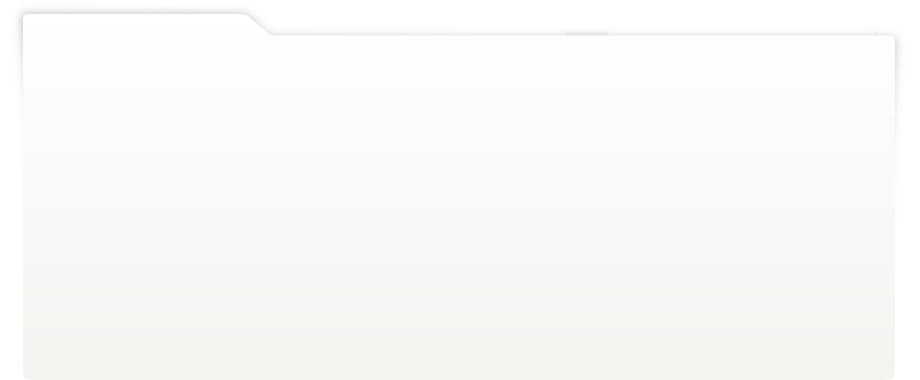
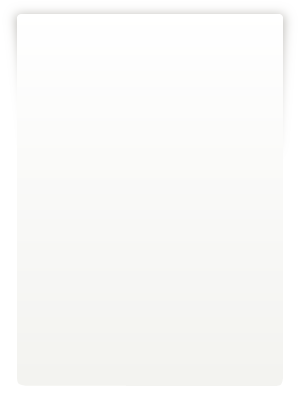
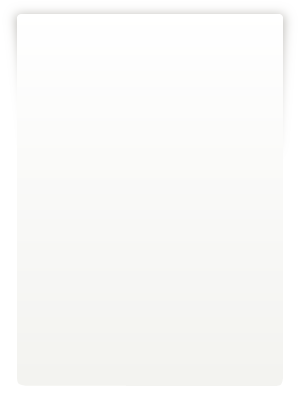
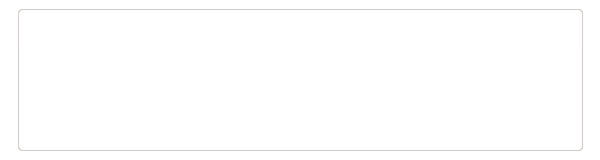
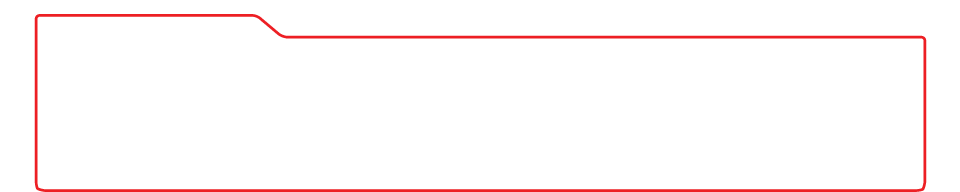
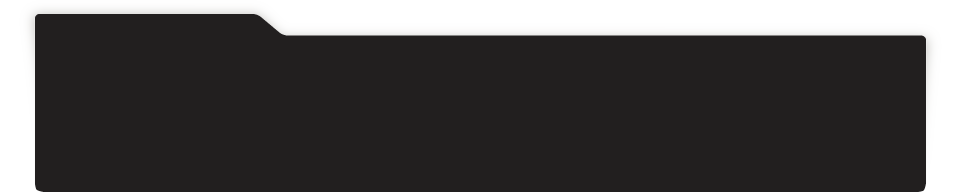
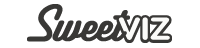
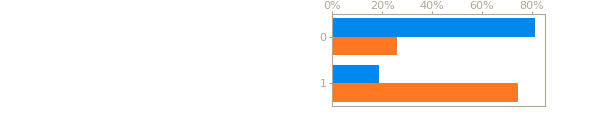
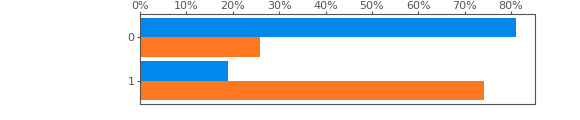
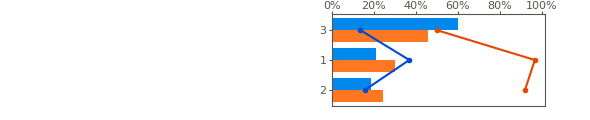
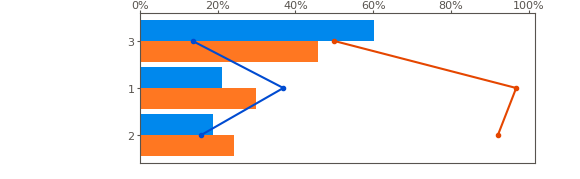
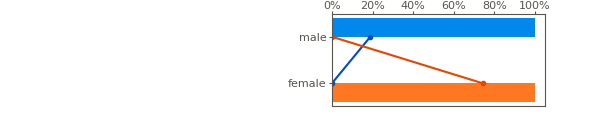
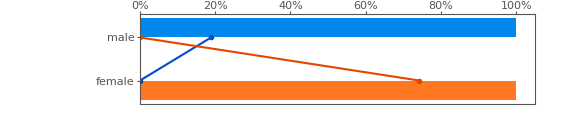
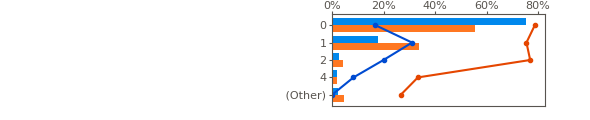
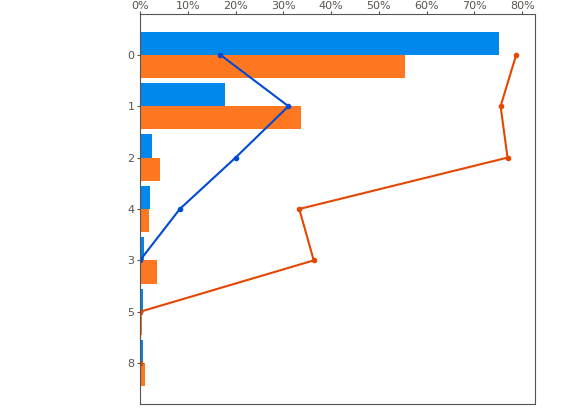
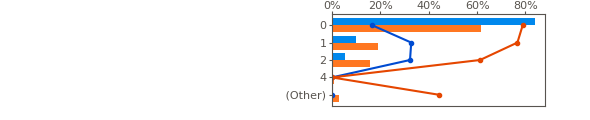
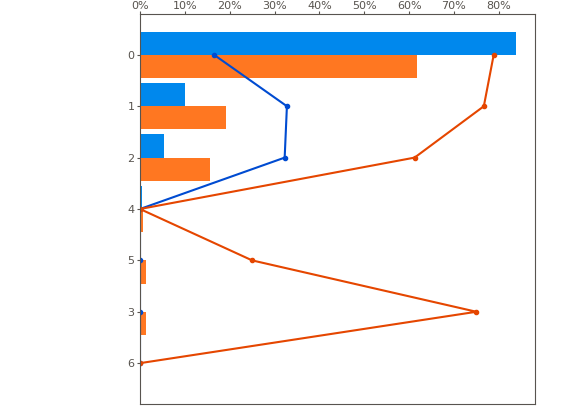
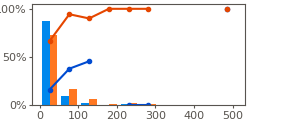
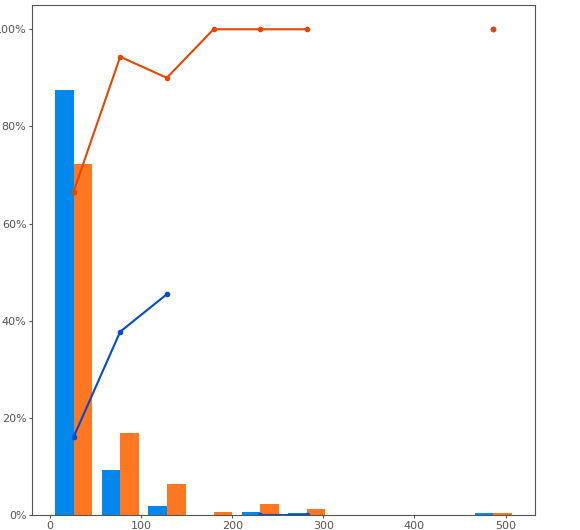
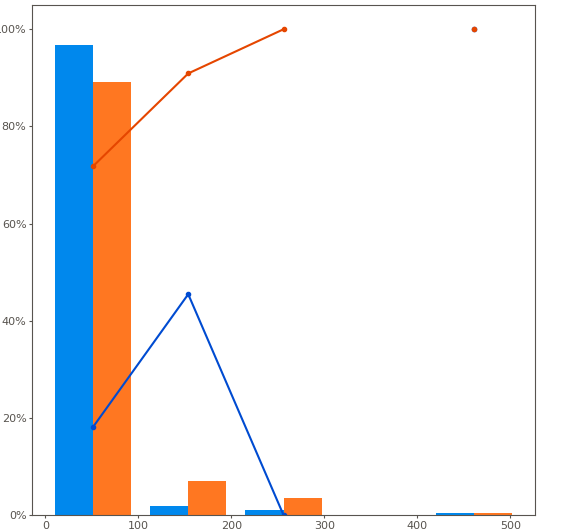
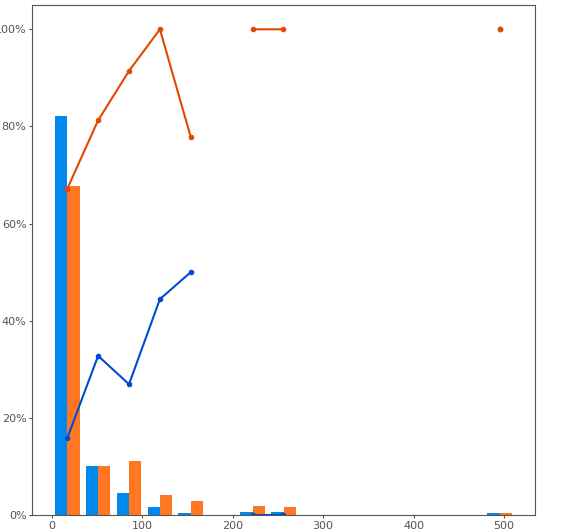
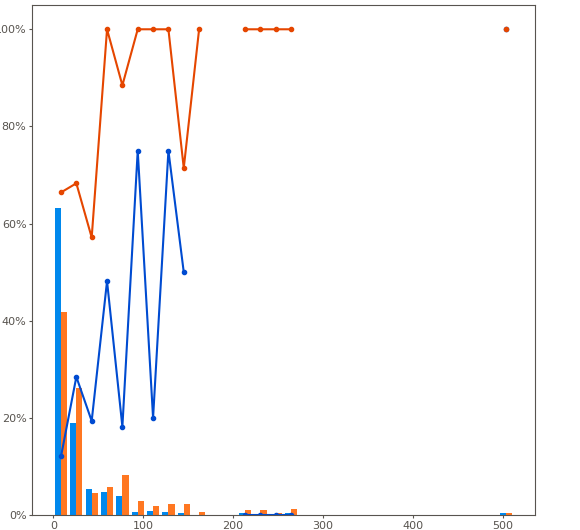
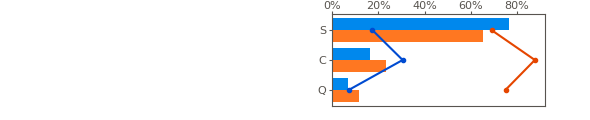
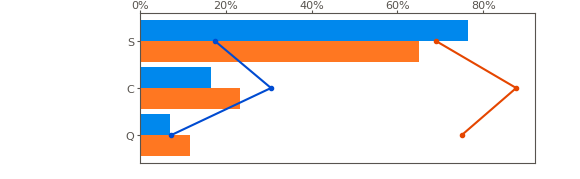
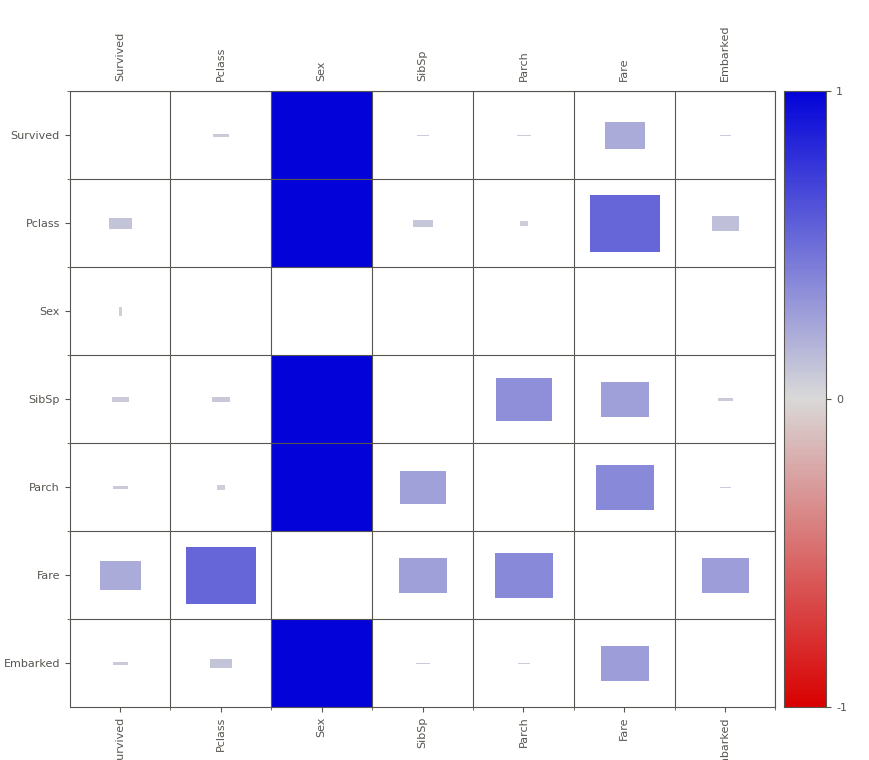
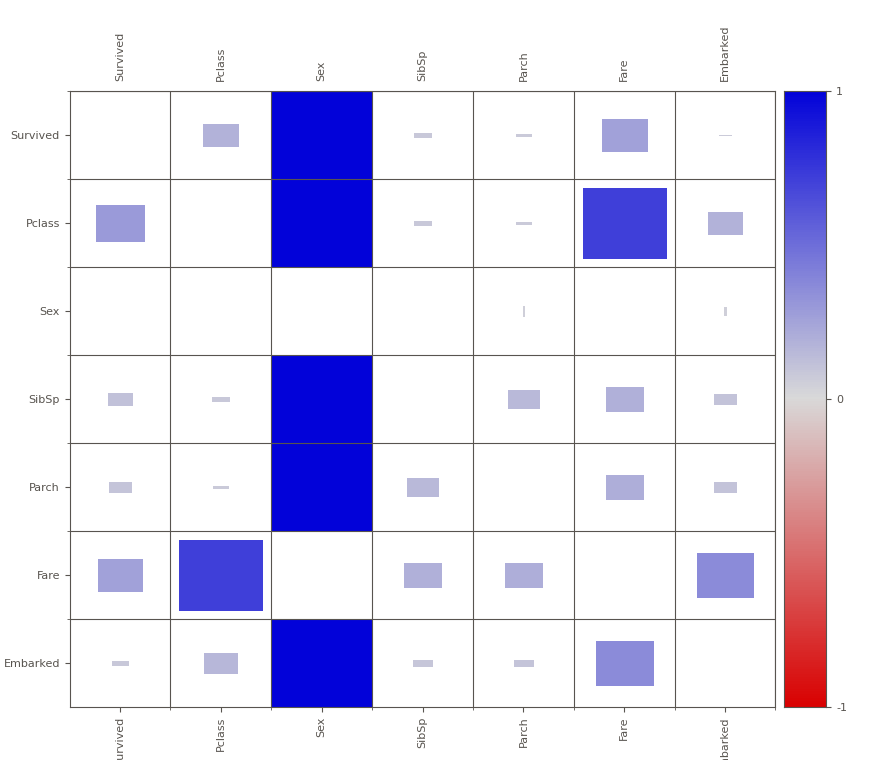

In [ ]:
my_report.show_notebook(scale=0.9)

## [dataprep](https://www.kaggle.com/code/andreshg/automatic-eda-libraries-comparisson)

In [ ]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.7/764.7 KB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 KB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 10.

In [ ]:
from dataprep.eda import plot, plot_correlation, create_report, plot_missing

In [ ]:
plot(df)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
create_report(df)

Output hidden; open in https://colab.research.google.com to view.